In [1]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt
import plotly.io as pio
#import squarify #treemap
import os
import matplotlib
import warnings



#to enable the inline plotting
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")

In [2]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler


from scipy.stats import normaltest

from pandas_profiling import ProfileReport

from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.style.palettes import PALETTES, SEQUENCES, color_palette

import lazypredict
from lazypredict.Supervised import LazyClassifier

warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Function for EDA. Using the display() function to have  well-formatted tables. We are mainly using pandas to explore the datasets

def dataset_description(df_target):

    print('This is the Dataset shape: %s\n' % (df_target.shape, ))
    print('Dataset columns: %s\n' % df_target.columns)

    print('\nColumns description:\n')
    display(df_target.info())
    display(df_target.describe())  # describe the dataset

    print('\nNull values:\n')
    display(df_target.isnull().sum())  # Identify null values

#function performing a quick check on df_inspection to have best of pandas functions separated by a line
def quick_check(dataframe):
    print('First 5 rows %s\n')
    print(dataframe.head(2))
    print("=====================================")
    print('Dataframe shape %s\n')
    print(dataframe.shape)
    print("=====================================")
    print('Dataframe describe categorical %s\n')
    print(dataframe.describe(include=['O']))
    print("=====================================")
    print('Dataframe null values %s\n')
    print(dataframe.isnull().sum())
    print("=====================================")
    print('Dataframe value counts %s\n')
    print(dataframe.value_counts())
    print("=====================================")

#stats function
def stats(dataframe):
    print('Dataframe correlation %s\n')
    print(dataframe.corr())
    print("=====================================")
    print('Dataframe covariance %s\n')
    print(dataframe.cov())
    print("=====================================")
    print('Dataframe skew %s\n')
    print(dataframe.skew())
    print("=====================================")
    print('Dataframe kurtosis %s\n')
    print(dataframe.kurt())
    print("=====================================")

#create a function to normalize characters from a dataset's column in Spanish
def normalize_characters(df, column):
    df[column] = df[column].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    df[column] = df[column].str.lower()
    df[column] = df[column].str.replace('á', 'a')
    df[column] = df[column].str.replace('é', 'e')
    df[column] = df[column].str.replace('í', 'i')
    df[column] = df[column].str.replace('ó', 'o')
    df[column] = df[column].str.replace('ú', 'u')
    df[column] = df[column].str.replace('ñ', 'n')
    df[column] = df[column].str.replace('ü', 'u')
    df[column] = df[column].str.replace('ç', 'c')
    df[column] = df[column].str.replace('(', '')
    df[column] = df[column].str.replace(')', '')
    df[column] = df[column].str.replace('\'', '')
    df[column] = df[column].str.replace('´', '')
    df[column] = df[column].str.replace('`', '')
    df[column] = df[column].str.replace('’', '')
    return df.head(2)

#create function to change detypes in64 to int32 in a df
def change_dtypes(df):
    for col in df.columns:
        if df[col].dtype == 'int64':
            df[col] = df[col].astype('int32')
        elif df[col].dtype == 'float64':
            df[col] = df[col].astype('float32')
    return df

In [4]:
#show all print outputs when using a function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#display all columns
pd.set_option('display.max_columns', None)

In [5]:
#point to the folder where the data is stored for Pedro
os.chdir(r"C:\Users\alfon\Desktop\Máster IE - Business Analytics & Big Data\3rd Term\Sustainability Datathon\Data")

# Loading inspection data
df_inspection = pd.read_csv('inspections.csv')

# Loading network data
df_network = pd.read_csv('network.csv')

# Loading submission data
df_submission = pd.read_csv('sample_submission.csv')

# Loading train data
df_train = pd.read_csv('train_consolidated_with_outliers.csv')

In [6]:
df_train.columns

Index(['PipeId', 'MaintenanceId', 'InspectionYear', 'InspectionDate',
       'MonthsLastRev', 'Incidence', 'Province', 'Town', 'YearBuilt',
       'Diameter', 'Length', 'Pressure', 'NumConnections',
       'NumConnectionsUnder', 'BoolBridle', 'No_Inspections',
       'No_Previous_Incidences', 'average_severity_pipe', 'relative_risk',
       'preventive_maintenance_rate', 'Probability_rate',
       'Average_MonthsLastRev', 'pipe_inspected_frequently',
       'Age_pipe_at_inspection', 'aspect', 'Relative_Thickness', 'pipe_area',
       'Total_Connections', 'area_connection', 'incidence_area',
       'connection_bool', 'Severity_high', 'Severity_medium', 'Severity_low',
       'No_Previous_Severity_Low', 'No_Previous_Severity_Medium',
       'No_Previous_Severity_High', 'gas_natural',
       'Material_Acrylonitrile-Butadiene-Styrene', 'Material_Copper',
       'Material_Fiberglass-Reinforced Plastic', 'Material_Polyethylene',
       'Material_Polypropylene', 'Diameter2', 'Length2', 'Press

In [7]:
df_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909733 entries, 0 to 909732
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   PipeId     909733 non-null  int64
 1   Incidence  909733 non-null  int64
dtypes: int64(2)
memory usage: 13.9 MB


In [8]:
#I want to know how many different PipeId are in df_submission
df_submission['PipeId'].nunique()

909733

There is just one inspection per each pipe in the period 2021 and 2022

In [9]:
sub_pipeline=pd.merge(df_submission, df_network, on='PipeId', how='left')


In [10]:
sub_pipeline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 909733 entries, 0 to 909732
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   PipeId               909733 non-null  int64  
 1   Incidence            909733 non-null  int64  
 2   Province             909733 non-null  object 
 3   Town                 909733 non-null  object 
 4   YearBuilt            909733 non-null  int64  
 5   Material             909733 non-null  object 
 6   GasType              909733 non-null  object 
 7   Diameter             909733 non-null  float64
 8   Length               909733 non-null  float64
 9   Pressure             909733 non-null  float64
 10  NumConnections       909733 non-null  int64  
 11  NumConnectionsUnder  909733 non-null  int64  
 12  BoolBridle           909733 non-null  bool   
dtypes: bool(1), float64(3), int64(5), object(4)
memory usage: 91.1+ MB


In [11]:
#get the names of all the columns in df_trainç
df_train.columns

Index(['PipeId', 'MaintenanceId', 'InspectionYear', 'InspectionDate',
       'MonthsLastRev', 'Incidence', 'Province', 'Town', 'YearBuilt',
       'Diameter', 'Length', 'Pressure', 'NumConnections',
       'NumConnectionsUnder', 'BoolBridle', 'No_Inspections',
       'No_Previous_Incidences', 'average_severity_pipe', 'relative_risk',
       'preventive_maintenance_rate', 'Probability_rate',
       'Average_MonthsLastRev', 'pipe_inspected_frequently',
       'Age_pipe_at_inspection', 'aspect', 'Relative_Thickness', 'pipe_area',
       'Total_Connections', 'area_connection', 'incidence_area',
       'connection_bool', 'Severity_high', 'Severity_medium', 'Severity_low',
       'No_Previous_Severity_Low', 'No_Previous_Severity_Medium',
       'No_Previous_Severity_High', 'gas_natural',
       'Material_Acrylonitrile-Butadiene-Styrene', 'Material_Copper',
       'Material_Fiberglass-Reinforced Plastic', 'Material_Polyethylene',
       'Material_Polypropylene', 'Diameter2', 'Length2', 'Press

In [12]:
#Converting diameter to int
sub_pipeline['Diameter'] = sub_pipeline['Diameter'].astype('int64')

In [13]:
#divide all values in Diameter by 1000 to convert to meters
sub_pipeline['Diameter'] = sub_pipeline['Diameter'] / 1000

In [14]:
#create a new variable called aspect that is equal to pressure divided by diameter multiplied by length
sub_pipeline['aspect']=(sub_pipeline['Pressure']/sub_pipeline['Diameter'])*sub_pipeline['Length']

In [15]:
#create a new column that divides the diameter by the pressure and name it Relative Thickness
sub_pipeline['Relative_Thickness'] = sub_pipeline['Diameter'] / sub_pipeline['Pressure']

In [16]:
#creating a column named pipe_area that multiplies diameter by lenght by pi

sub_pipeline['pipe_area'] = sub_pipeline['Diameter'] * sub_pipeline['Length'] * 3.1416

In [17]:
#Create a column called Total_Connections that adds NumConnections and NumConnectionsUnder
sub_pipeline['Total_Connections'] = sub_pipeline['NumConnections'] + sub_pipeline['NumConnectionsUnder']

In [18]:
#create a column named area_connection that divides pipe_area by NumConnections
sub_pipeline['area_connection'] = sub_pipeline['Total_Connections']/ sub_pipeline['pipe_area'] 

In [19]:
#create a boolean column named connection_bool that is 1 if NumConnections is greater than 1
sub_pipeline['connection_bool'] = np.where(sub_pipeline['NumConnections'] > 1, 1, 0)

In [20]:
# Converting Boolbride into  boolean variable
def boolbridle(x):
    return 1 if x == 'True' else 0

In [21]:
# Apply function on dataset
sub_pipeline['BoolBridle'] =sub_pipeline['BoolBridle'].apply(lambda x: boolbridle(x))

In [22]:
#hot encode GasType column in the train_copy dataframe subset
sub_pipeline = pd.get_dummies(sub_pipeline, columns=['GasType'], prefix = ['GasType'])

In [23]:
#delete GasType_Gas propano column
sub_pipeline = sub_pipeline.drop(['GasType_Gas propano'], axis=1)

In [24]:
#change name of GasType_Gas natural column to gas_natural
sub_pipeline = sub_pipeline.rename(columns={'GasType_Gas natural': 'gas_natural'})
sub_pipeline.head(1)

,PipeId,Incidence,Province,Town,YearBuilt,Material,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection,connection_bool,gas_natural
0,446859944,0,Valencia,Alginet,2012,PE,0.11,44.29,0.15,0,0,0,60.39,0.73,15.30,0,0.00,0,1


In [25]:
sub_pipeline.head(1)

,PipeId,Incidence,Province,Town,YearBuilt,Material,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection,connection_bool,gas_natural
0,446859944,0,Valencia,Alginet,2012,PE,0.11,44.29,0.15,0,0,0,60.39,0.73,15.30,0,0.00,0,1


In [26]:
print (sub_pipeline['Material'].unique())

['PE' 'PN' 'AO' 'FD' 'CU' 'ZD' 'FI' 'PA' 'FG']


In [27]:
#Map df_combined Material column to the names of materials
sub_pipeline['Material'] = sub_pipeline['Material'].map({'PE': 'Polyethylene', 'AO': 'Acrylonitrile-Butadiene-Styrene', 'FD': 'Fiberglass-Reinforced Plastic', 
    'FG': 'Fiberglass', 'PN': 'Polypropylene', 'PA': 'Polyamide', 'FO': 'Flexible Polyolefin', 'FI': 'Flexible Polyvinyl Chloride', 'CU': 'Copper', 
    'PV': 'Polyvinylidene Fluoride', 'ZD': 'Zinc-Coated Steel', 'ZA': 'Zinc-Aluminum', 'CP': 'Cast Iron', 'CS': 'Cast Steel', 
    'ZC': 'Zinc-Coated Steel', 'ZM': 'Zinc-Magnesium','ZN': 'Zinc', 'AL': 'Aluminum', 'ZP': 'Zinc-Coated Steel', 'ZF': 'Zinc-Aluminum-Magnesium'})

In [28]:
#Hot enconde Material column in the train_copy dataframe subset
sub_pipeline = pd.get_dummies(sub_pipeline, columns=['Material'])
sub_pipeline = sub_pipeline.drop(['Material_Fiberglass', 'Material_Zinc-Coated Steel', 'Material_Flexible Polyvinyl Chloride', 'Material_Polyamide'], axis=1)
sub_pipeline.head(1)

,PipeId,Incidence,Province,Town,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene
0,446859944,0,Valencia,Alginet,2012,0.11,44.29,0.15,0,0,0,60.39,0.73,15.30,0,0.00,0,1,0,0,0,1,0


In [29]:
sub_pipeline.head(1)

,PipeId,Incidence,Province,Town,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene
0,446859944,0,Valencia,Alginet,2012,0.11,44.29,0.15,0,0,0,60.39,0.73,15.30,0,0.00,0,1,0,0,0,1,0


In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
#create polinomial features in train_copy for Diameter, Length, Pressure
poly = PolynomialFeatures(2)
sub_pipeline['Diameter2'] = poly.fit_transform(sub_pipeline[['Diameter']])[:,2]
sub_pipeline['Length2'] = poly.fit_transform(sub_pipeline[['Length']])[:,2]
sub_pipeline['Pressure2'] = poly.fit_transform(sub_pipeline[['Pressure']])[:,2]
sub_pipeline.head(1)


,PipeId,Incidence,Province,Town,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2
0,446859944,0,Valencia,Alginet,2012,0.11,44.29,0.15,0,0,0,60.39,0.73,15.30,0,0.00,0,1,0,0,0,1,0,0.01,1961.25,0.02


In [32]:
#point to the folder where the data is stored
os.chdir(r"C:\Users\alfon\Desktop\Máster IE - Business Analytics & Big Data\3rd Term\Sustainability Datathon\Data\Pedro")

# Loading provincias dataset
provincias = pd.read_excel('promedio_tiempo_provincia_anual.xlsx')

In [33]:
provincias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Province                         38 non-null     object 
 1   Average yearly temperature (°C)  38 non-null     float64
 2   Min. Temperature (°C)            38 non-null     float64
 3   Max. Temperature (°C)            38 non-null     float64
 4   Yearly Rainfall (mm)             38 non-null     int64  
 5   Average year Humidity (%)        38 non-null     float64
 6   Rainy days per year (days)       38 non-null     int64  
 7   Yearly Sun Hours (hours)         38 non-null     float64
dtypes: float64(5), int64(2), object(1)
memory usage: 2.5+ KB


In [34]:
normalize_characters(sub_pipeline, 'Province')
normalize_characters(provincias, 'Province')

,PipeId,Incidence,Province,Town,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2
0,446859944,0,valencia,Alginet,2012,0.11,44.29,0.15,0,0,0,60.39,0.73,15.30,0,0.00,0,1,0,0,0,1,0,0.01,1961.25,0.02
1,428124500,0,valencia,Alginet,2012,0.16,110.72,0.15,2,0,0,103.80,1.07,55.65,2,0.04,1,1,0,0,0,1,0,0.03,12257.81,0.02


,Province,Average yearly temperature (°C),Min. Temperature (°C),Max. Temperature (°C),Yearly Rainfall (mm),Average year Humidity (%),Rainy days per year (days),Yearly Sun Hours (hours)
0,lleida,15.46,1.80,32.90,461,0.59,50,112.40
1,la rioja,12.38,1.70,26.90,633,0.72,87,85.20


In [35]:
#join train_copy and provincias on Province

sub_pipeline = sub_pipeline.merge(provincias, on='Province', how='left')

In [36]:
sub_pipeline

,PipeId,Incidence,Province,Town,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average yearly temperature (°C),Min. Temperature (°C),Max. Temperature (°C),Yearly Rainfall (mm),Average year Humidity (%),Rainy days per year (days),Yearly Sun Hours (hours)
0,446859944,0,valencia,Alginet,2012,0.11,44.29,0.15,0,0,0,60.39,0.73,15.30,0,0.00,0,1,0,0,0,1,0,0.01,1961.25,0.02,17.62,6.60,30.80,427,0.64,46,113.20
1,428124500,0,valencia,Alginet,2012,0.16,110.72,0.15,2,0,0,103.80,1.07,55.65,2,0.04,1,1,0,0,0,1,0,0.03,12257.81,0.02,17.62,6.60,30.80,427,0.64,46,113.20
2,438428871,0,valencia,Alginet,2012,0.11,13.57,0.15,0,0,0,18.51,0.73,4.69,0,0.00,0,1,0,0,0,1,0,0.01,184.28,0.02,17.62,6.60,30.80,427,0.64,46,113.20
3,429034569,0,valencia,Alginet,2012,0.11,327.69,0.15,3,0,0,446.85,0.73,113.24,3,0.03,1,1,0,0,0,1,0,0.01,107380.08,0.02,17.62,6.60,30.80,427,0.64,46,113.20
4,411184477,0,valencia,Alginet,2007,0.20,932.76,0.15,0,0,0,699.57,1.33,586.07,0,0.00,0,1,0,0,0,1,0,0.04,870044.95,0.02,17.62,6.60,30.80,427,0.64,46,113.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909728,235426649,0,valencia,Paterna,2004,0.11,7.66,0.03,0,0,0,1.74,4.40,2.65,0,0.00,0,1,0,0,0,1,0,0.01,58.61,0.00,17.62,6.60,30.80,427,0.64,46,113.20
909729,235426673,0,valencia,Paterna,2004,0.11,4.38,0.03,2,0,0,1.00,4.40,1.51,2,1.32,1,1,0,0,0,1,0,0.01,19.21,0.00,17.62,6.60,30.80,427,0.64,46,113.20
909730,235426707,0,valencia,Paterna,2004,0.11,2.29,0.03,1,0,0,0.52,4.40,0.79,1,1.26,0,1,0,0,0,1,0,0.01,5.25,0.00,17.62,6.60,30.80,427,0.64,46,113.20
909731,190956601,0,valencia,Paterna,2004,0.09,87.81,4.00,0,0,0,3902.62,0.02,24.83,0,0.00,0,1,0,0,0,1,0,0.01,7710.42,16.00,17.62,6.60,30.80,427,0.64,46,113.20


In [37]:
#show me values in Province column for nan in Yearly Sun Hours (hours) columnç
sub_pipeline[sub_pipeline['Yearly Sun Hours (hours)'].isnull()]['Province'].unique()

array([], dtype=object)

In [38]:
#for a row with same PipeId and InspectionYear, create a new column counting the number of MaintenanceId per Pipe and name it No_Inspections
df_inspection['No_Inspections'] = df_inspection.groupby(['PipeId', 'InspectionYear'])['MaintenanceId'].transform('count')


In [39]:
#for a same PipeId, create a new column No_Inspections_Year summing the previous value in No_Inspections starting in 2010
df_inspection['No_Inspections_Year'] = df_inspection.groupby(['PipeId'])['No_Inspections'].transform(lambda x: x.cumsum())

In [40]:
#query pipeid 489616
df_inspection[df_inspection['PipeId'] == 489645].head(10)

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,No_Inspections,No_Inspections_Year
1471999,489645,ZRV-00003385,2013,2013-05-08,16,4,0,1,1
2568772,489645,ZRV-00003385,2015,2015-03-24,22,4,0,1,2
3672439,489645,ZRV-00003385,2016,2017-01-12,22,4,0,1,3
4987524,489645,ZRV-00003385,2018,2018-12-19,23,4,0,1,4
6323668,489645,ZRV-00003385,2020,2020-12-05,24,4,0,1,5


In [41]:
#drop No_Inspections column
df_inspection = df_inspection.drop(['No_Inspections'], axis=1)

In [42]:
#chaning name to No_Inspections_Year to No_Inspections
df_inspection = df_inspection.rename(columns={'No_Inspections_Year': 'No_Inspections'})

In [43]:
#for a row with same PipeId and InspectionYear, create a new column suming the number of Incidences per Pipe and name it No_Incidences
df_inspection['No_Incidences'] = df_inspection.groupby(['PipeId', 'InspectionYear'])['Incidence'].transform('sum')

In [44]:
#for a same PipeId, create a new column No_Incidences_Total summing the previous value in No_Incidences starting in 2010
df_inspection['No_Incidences_Total'] = df_inspection.groupby(['PipeId'])['No_Incidences'].transform(lambda x: x.cumsum())
df_inspection['No_Previous_Incidences']=df_inspection['No_Incidences_Total']-df_inspection['Incidence']

In [45]:
#querying rows with No_Incidences_Total > 1
df_inspection[df_inspection['No_Previous_Incidences'] > 3].head(10)

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,No_Inspections,No_Incidences,No_Incidences_Total,No_Previous_Incidences
5007948,12688060,ZRV-00003720,2019,2019-01-09,23,2,1,5,1,5,4
6002526,297684002,ZRV-00003771,2020,2020-06-03,23,4,0,6,0,4,4
6302843,12688060,ZRV-00003720,2020,2020-11-24,22,4,0,6,0,5,5


In [46]:
df_inspection[df_inspection['PipeId'] == 188488937][['PipeId', 'InspectionYear', "Incidence",'No_Previous_Incidences']].head(10)

,PipeId,InspectionYear,Incidence,No_Previous_Incidences
80003,188488937,2010,0,0
1229082,188488937,2012,1,0
1841005,188488937,2014,0,1
3042139,188488937,2016,0,1
4354922,188488937,2018,0,1
5729935,188488937,2020,1,1


In [47]:
df_inspection = df_inspection.drop(['No_Incidences','No_Incidences_Total'], axis=1)

In [48]:
#create a column named average_severity_pipe that calculates the average severity per pipe aggregating all severities
df_inspection['average_severity_pipe'] = df_inspection.groupby('PipeId')['Severity'].transform('mean')
#show head of rows only where mean has a decimal value
df_inspection[df_inspection['average_severity_pipe'] % 1 != 0].head(3)

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,No_Inspections,No_Previous_Incidences,average_severity_pipe
23,188889938,ZRV-00001406,2010,2010-10-01,22,4,0,1,0,3.83
36,188909811,ZRV-00001406,2010,2010-10-01,22,4,0,1,0,3.50
92,189128842,ZRV-00001406,2010,2010-10-01,22,4,0,1,0,3.83


In [49]:
#create a column taking average severity and number of total incidences per pipe multiplying them and naming it as risk_(s*i)
df_inspection['relative_risk'] = df_inspection['average_severity_pipe'] * df_inspection['No_Previous_Incidences']
#show shape of relative_risk = 0
df_inspection[df_inspection['relative_risk'] == 0].shape

(6322541, 11)

In [50]:
#create a new column taking Risk_S*I and dividing it by No_Inspections naming it as Risk_S*I/Inspections and placing it in 6th position
df_inspection['preventive_maintenance_rate'] = df_inspection['relative_risk'] / df_inspection['No_Inspections']
cols = list(df_inspection.columns.values)

#show head of rows only where Risk_S*I/Inspections is greater than 0
df_inspection[df_inspection['preventive_maintenance_rate'] > 0].head(5)

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,No_Inspections,No_Previous_Incidences,average_severity_pipe,relative_risk,preventive_maintenance_rate
620466,189468698,ZRV-00004265,2012,2011-12-26,11,4,0,2,1,3.83,3.83,1.92
629523,189461186,ZRV-00004265,2012,2012-01-02,12,4,0,2,1,3.83,3.83,1.92
632278,189461193,ZRV-00004265,2012,2012-01-03,12,4,0,2,1,3.83,3.83,1.92
632284,190636671,ZRV-00004265,2012,2012-01-03,12,4,0,2,1,3.83,3.83,1.92
648935,258639086,ZRV-00004265,2012,2012-01-12,12,4,0,2,1,3.40,3.40,1.70


In [51]:
#creating a new column named probability with No_Incidents divided by Inspections
df_inspection['Probability_rate'] = df_inspection['No_Previous_Incidences'] / df_inspection['No_Inspections']

#show head of rows only where Probability is greater than 0
df_inspection[df_inspection['Probability_rate'] > 0].head(5)

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,No_Inspections,No_Previous_Incidences,average_severity_pipe,relative_risk,preventive_maintenance_rate,Probability_rate
620466,189468698,ZRV-00004265,2012,2011-12-26,11,4,0,2,1,3.83,3.83,1.92,0.50
629523,189461186,ZRV-00004265,2012,2012-01-02,12,4,0,2,1,3.83,3.83,1.92,0.50
632278,189461193,ZRV-00004265,2012,2012-01-03,12,4,0,2,1,3.83,3.83,1.92,0.50
632284,190636671,ZRV-00004265,2012,2012-01-03,12,4,0,2,1,3.83,3.83,1.92,0.50
648935,258639086,ZRV-00004265,2012,2012-01-12,12,4,0,2,1,3.40,3.40,1.70,0.50


In [52]:
#creating a column with the Average of MonthsLastRev grouping per PipeId 
df_inspection['Average_MonthsLastRev'] = df_inspection.groupby('PipeId')['MonthsLastRev'].transform('mean')
cols = list(df_inspection.columns.values)

df_inspection.head(1)

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,No_Inspections,No_Previous_Incidences,average_severity_pipe,relative_risk,preventive_maintenance_rate,Probability_rate,Average_MonthsLastRev
0,189311802,ZRV-00001972,2010,2010-10-01,24,4,0,1,0,4.00,0.00,0.00,0.00,24.00


In [53]:
#create a new column named pipe_inspected_frequently with a value of 1 if pipe has an Average_MonthsLastRev of less or equal than 24
df_inspection['pipe_inspected_frequently'] = np.where(df_inspection['Average_MonthsLastRev'] <= 24, 1, 0)

#delete column Average_MonthsLastRev
df_inspection.head(1)

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,No_Inspections,No_Previous_Incidences,average_severity_pipe,relative_risk,preventive_maintenance_rate,Probability_rate,Average_MonthsLastRev,pipe_inspected_frequently
0,189311802,ZRV-00001972,2010,2010-10-01,24,4,0,1,0,4.00,0.00,0.00,0.00,24.00,1


In [54]:
#I want to order the dataframe grouping by pipeid and sorting by InspectionYear

df_inspection = df_inspection.sort_values(['PipeId', 'InspectionYear'], ascending=[True, True])

In [55]:
#hot encode severity_incidence column in the train_copy dataframe
df_inspection = pd.get_dummies(df_inspection, columns=['Severity'], prefix = ['Severity'])
df_inspection.head(1)

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Incidence,No_Inspections,No_Previous_Incidences,average_severity_pipe,relative_risk,preventive_maintenance_rate,Probability_rate,Average_MonthsLastRev,pipe_inspected_frequently,Severity_1,Severity_2,Severity_3,Severity_4
1471712,489616,ZRV-00003385,2013,2013-05-08,16,0,1,0,4.00,0.00,0.00,0.00,21.40,1,0,0,0,1


In [56]:
#change name of Severity_Incidence_1 column to Severity_low
df_inspection = df_inspection.rename(columns={'Severity_1': 'Severity_high'})
#change name of Severity_Incidence_2 column to Severity_medium
df_inspection = df_inspection.rename(columns={'Severity_2': 'Severity_medium'})
#change name of Severity_Incidence_3 column to Severity_high
df_inspection= df_inspection.rename(columns={'Severity_3': 'Severity_low'})
#drop Severity_4.0 column
df_inspection = df_inspection.drop(['Severity_4'], axis=1)

In [57]:
df_inspection['No_Severity_Low'] = df_inspection.groupby(['PipeId', 'InspectionYear'])['Severity_low'].transform('sum')
df_inspection['No_Severity_Medium'] = df_inspection.groupby(['PipeId', 'InspectionYear'])['Severity_medium'].transform('sum')
df_inspection['No_Severity_High'] = df_inspection.groupby(['PipeId', 'InspectionYear'])['Severity_high'].transform('sum')

In [58]:
df_inspection['No_Severity_Low_Total'] = df_inspection.groupby(['PipeId'])['No_Severity_Low'].transform(lambda x: x.cumsum())
df_inspection['No_Previous_Severity_Low']=df_inspection['No_Severity_Low_Total']-df_inspection['Severity_low']

df_inspection['No_Severity_Medium_Total'] = df_inspection.groupby(['PipeId'])['No_Severity_Medium'].transform(lambda x: x.cumsum())
df_inspection['No_Previous_Severity_Medium']=df_inspection['No_Severity_Medium_Total']-df_inspection['Severity_medium']

df_inspection['No_Severity_High_Total'] = df_inspection.groupby(['PipeId'])['No_Severity_High'].transform(lambda x: x.cumsum())
df_inspection['No_Previous_Severity_High']=df_inspection['No_Severity_High_Total']-df_inspection['Severity_high']

In [59]:
df_inspection[df_inspection['No_Previous_Severity_High'] > 1].head(10)

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Incidence,No_Inspections,No_Previous_Incidences,average_severity_pipe,relative_risk,preventive_maintenance_rate,Probability_rate,Average_MonthsLastRev,pipe_inspected_frequently,Severity_high,Severity_medium,Severity_low,No_Severity_Low,No_Severity_Medium,No_Severity_High,No_Severity_Low_Total,No_Previous_Severity_Low,No_Severity_Medium_Total,No_Previous_Severity_Medium,No_Severity_High_Total,No_Previous_Severity_High
4301685,57502787,ZRV-00003834,2017,2017-11-23,23,0,4,2,2.80,5.60,1.40,0.50,21.60,1,0,0,0,0,0,0,0,0,0,0,2,2
5543280,57502787,ZRV-00003834,2019,2019-09-23,22,0,5,2,2.80,5.60,1.12,0.40,21.60,1,0,0,0,0,0,0,0,0,0,0,2,2
4744985,133512092,ZRV-00004714,2018,2018-07-13,24,0,4,2,2.80,5.60,1.40,0.50,23.60,1,0,0,0,0,0,0,0,0,0,0,2,2
6083871,133512092,ZRV-00004714,2020,2020-07-10,24,0,5,2,2.80,5.60,1.12,0.40,23.60,1,0,0,0,0,0,0,0,0,0,0,2,2
3457147,189093375,ZRV-00001386,2016,2016-08-08,24,0,4,2,3.00,6.00,1.50,0.50,22.00,1,0,0,0,0,0,0,0,0,0,0,2,2
4792672,189093375,ZRV-00001386,2018,2018-08-16,24,0,5,2,3.00,6.00,1.20,0.40,22.00,1,0,0,0,0,0,0,0,0,0,0,2,2
6114013,189093375,ZRV-00001386,2020,2020-07-28,23,0,6,2,3.00,6.00,1.00,0.33,22.00,1,0,0,0,0,0,0,0,0,0,0,2,2
5021932,191115277,ZRV-00003674,2019,2019-01-16,24,0,5,2,2.80,5.60,1.12,0.40,23.20,1,0,0,0,0,0,0,0,0,0,0,2,2
4909546,278440072,ZRV-00003719,2018,2018-10-29,21,0,5,2,3.00,6.00,1.20,0.40,22.00,1,0,0,0,0,0,0,0,0,0,0,2,2
6149410,278440072,ZRV-00003719,2020,2020-08-26,22,0,6,2,3.00,6.00,1.00,0.33,22.00,1,0,0,0,0,0,0,0,0,0,0,2,2


In [60]:
df_inspection

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Incidence,No_Inspections,No_Previous_Incidences,average_severity_pipe,relative_risk,preventive_maintenance_rate,Probability_rate,Average_MonthsLastRev,pipe_inspected_frequently,Severity_high,Severity_medium,Severity_low,No_Severity_Low,No_Severity_Medium,No_Severity_High,No_Severity_Low_Total,No_Previous_Severity_Low,No_Severity_Medium_Total,No_Previous_Severity_Medium,No_Severity_High_Total,No_Previous_Severity_High
1471712,489616,ZRV-00003385,2013,2013-05-08,16,0,1,0,4.00,0.00,0.00,0.00,21.40,1,0,0,0,0,0,0,0,0,0,0,0,0
2534612,489616,ZRV-00003385,2015,2015-03-04,22,0,2,0,4.00,0.00,0.00,0.00,21.40,1,0,0,0,0,0,0,0,0,0,0,0,0
3672443,489616,ZRV-00003385,2016,2017-01-12,22,0,3,0,4.00,0.00,0.00,0.00,21.40,1,0,0,0,0,0,0,0,0,0,0,0,0
4987503,489616,ZRV-00003385,2018,2018-12-19,23,0,4,0,4.00,0.00,0.00,0.00,21.40,1,0,0,0,0,0,0,0,0,0,0,0,0
6323662,489616,ZRV-00003385,2020,2020-12-05,24,0,5,0,4.00,0.00,0.00,0.00,21.40,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5597386,451995260,ZRV-00001573,2019,2019-10-23,24,0,4,0,4.00,0.00,0.00,0.00,24.00,1,0,0,0,0,0,0,0,0,0,0,0,0
1712425,451995309,ZRV-00001573,2013,2013-10-07,24,0,1,0,4.00,0.00,0.00,0.00,24.00,1,0,0,0,0,0,0,0,0,0,0,0,0
2907928,451995309,ZRV-00001573,2015,2015-10-05,24,0,2,0,4.00,0.00,0.00,0.00,24.00,1,0,0,0,0,0,0,0,0,0,0,0,0
4212425,451995309,ZRV-00001573,2017,2017-10-02,24,0,3,0,4.00,0.00,0.00,0.00,24.00,1,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
#Now I am fetching last value of each group

df_inspection_last= df_inspection.groupby('PipeId').last()
df_inspection_last

,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Incidence,No_Inspections,No_Previous_Incidences,average_severity_pipe,relative_risk,preventive_maintenance_rate,Probability_rate,Average_MonthsLastRev,pipe_inspected_frequently,Severity_high,Severity_medium,Severity_low,No_Severity_Low,No_Severity_Medium,No_Severity_High,No_Severity_Low_Total,No_Previous_Severity_Low,No_Severity_Medium_Total,No_Previous_Severity_Medium,No_Severity_High_Total,No_Previous_Severity_High
PipeId,,,,,,,,,,,,,,,,,,,,,,,,,
489616,ZRV-00003385,2020,2020-12-05,24,0,5,0,4.00,0.00,0.00,0.00,21.40,1,0,0,0,0,0,0,0,0,0,0,0,0
489645,ZRV-00003385,2020,2020-12-05,24,0,5,0,4.00,0.00,0.00,0.00,21.40,1,0,0,0,0,0,0,0,0,0,0,0,0
489646,ZRV-00003385,2020,2020-12-05,24,0,5,0,4.00,0.00,0.00,0.00,21.40,1,0,0,0,0,0,0,0,0,0,0,0,0
489780,ZRV-00003357,2020,2020-04-18,24,0,5,0,4.00,0.00,0.00,0.00,23.00,1,0,0,0,0,0,0,0,0,0,0,0,0
489790,ZRV-00003357,2020,2020-04-18,24,0,5,0,4.00,0.00,0.00,0.00,19.80,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451195430,ZRV-00004004,2019,2019-01-03,24,0,4,0,4.00,0.00,0.00,0.00,21.00,1,0,0,0,0,0,0,0,0,0,0,0,0
451195580,ZRV-00004004,2019,2019-01-02,24,0,4,0,4.00,0.00,0.00,0.00,24.00,1,0,0,0,0,0,0,0,0,0,0,0,0
451995254,ZRV-00001573,2019,2019-10-24,48,0,3,0,4.00,0.00,0.00,0.00,34.67,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
#Create a column named No_previous_incidences_last with the value of No_Previous_Incidences + value in Incidence columns of df_inspection_last
df_inspection_last['No_previous_incidences_last'] = df_inspection_last['No_Previous_Incidences'] + df_inspection_last['Incidence']
df_inspection_last['No_Previous_Severity_high_last'] = df_inspection_last['No_Previous_Severity_High'] + df_inspection_last['Severity_high']

df_inspection_last['No_Previous_Severity_medium_last'] = df_inspection_last['No_Previous_Severity_Medium'] + df_inspection_last['Severity_medium']

df_inspection_last['No_Previous_Severity_low_last'] = df_inspection_last['No_Previous_Severity_Low'] + df_inspection_last['Severity_low']

In [63]:
df_inspection_last

,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Incidence,No_Inspections,No_Previous_Incidences,average_severity_pipe,relative_risk,preventive_maintenance_rate,Probability_rate,Average_MonthsLastRev,pipe_inspected_frequently,Severity_high,Severity_medium,Severity_low,No_Severity_Low,No_Severity_Medium,No_Severity_High,No_Severity_Low_Total,No_Previous_Severity_Low,No_Severity_Medium_Total,No_Previous_Severity_Medium,No_Severity_High_Total,No_Previous_Severity_High,No_previous_incidences_last,No_Previous_Severity_high_last,No_Previous_Severity_medium_last,No_Previous_Severity_low_last
PipeId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
489616,ZRV-00003385,2020,2020-12-05,24,0,5,0,4.00,0.00,0.00,0.00,21.40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
489645,ZRV-00003385,2020,2020-12-05,24,0,5,0,4.00,0.00,0.00,0.00,21.40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
489646,ZRV-00003385,2020,2020-12-05,24,0,5,0,4.00,0.00,0.00,0.00,21.40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
489780,ZRV-00003357,2020,2020-04-18,24,0,5,0,4.00,0.00,0.00,0.00,23.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
489790,ZRV-00003357,2020,2020-04-18,24,0,5,0,4.00,0.00,0.00,0.00,19.80,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451195430,ZRV-00004004,2019,2019-01-03,24,0,4,0,4.00,0.00,0.00,0.00,21.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
451195580,ZRV-00004004,2019,2019-01-02,24,0,4,0,4.00,0.00,0.00,0.00,24.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
451995254,ZRV-00001573,2019,2019-10-24,48,0,3,0,4.00,0.00,0.00,0.00,34.67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
df_inspection_last = df_inspection_last.drop(['MaintenanceId','InspectionDate','MonthsLastRev', 'Incidence', 'relative_risk','preventive_maintenance_rate','Probability_rate','Severity_high','Severity_medium','Severity_low','No_Severity_Low','No_Severity_Medium','No_Severity_High','No_Severity_Low_Total','No_Severity_Medium_Total','No_Severity_High_Total','No_Previous_Severity_Low', 'No_Previous_Severity_Medium', 'No_Previous_Severity_High','No_Previous_Incidences'], axis=1)

In [65]:
#I want to rename some columns in df_inspection_last
df_inspection_last = df_inspection_last.rename(columns={'No_previous_incidences_last': 'No_Previous_Incidences', 'No_Previous_Severity_high_last': 'No_Previous_Severity_High', 'No_Previous_Severity_medium_last': 'No_Previous_Severity_Medium', 'No_Previous_Severity_low_last': 'No_Previous_Severity_Low'})

In [66]:
#Add to sub_pipeline the dataframe df_inspection_last based on PipeId and just for the PipeId in sub_pipeline
sub_pipeline = pd.merge(sub_pipeline, df_inspection_last, on='PipeId', how='left')



In [67]:
#Get all the columns of sub_pipeline
sub_pipeline.columns

Index(['PipeId', 'Incidence', 'Province', 'Town', 'YearBuilt', 'Diameter',
       'Length', 'Pressure', 'NumConnections', 'NumConnectionsUnder',
       'BoolBridle', 'aspect', 'Relative_Thickness', 'pipe_area',
       'Total_Connections', 'area_connection', 'connection_bool',
       'gas_natural', 'Material_Acrylonitrile-Butadiene-Styrene',
       'Material_Copper', 'Material_Fiberglass-Reinforced Plastic',
       'Material_Polyethylene', 'Material_Polypropylene', 'Diameter2',
       'Length2', 'Pressure2', 'Average yearly temperature (°C)',
       'Min. Temperature (°C)', 'Max. Temperature (°C)',
       'Yearly Rainfall (mm)', 'Average year Humidity (%)',
       'Rainy days per year (days)', 'Yearly Sun Hours (hours)',
       'InspectionYear', 'No_Inspections', 'average_severity_pipe',
       'Average_MonthsLastRev', 'pipe_inspected_frequently',
       'No_Previous_Incidences', 'No_Previous_Severity_High',
       'No_Previous_Severity_Medium', 'No_Previous_Severity_Low'],
      dtype=

In [68]:
sub_pipeline['InspectionYear'] = sub_pipeline['InspectionYear'].fillna(sub_pipeline['YearBuilt'])
#rename column InspectionYear_y to LastInspectionYear
sub_pipeline = sub_pipeline.rename(columns={'InspectionYear': 'LastInspectionYear'})
#when the value of LastInspectionYear is smaller than 2009, I want to replace it with 2009
sub_pipeline['LastInspectionYear'] = np.where(sub_pipeline['LastInspectionYear'] < 2009, 2009, sub_pipeline['LastInspectionYear'])

In [69]:
sub_pipeline

,PipeId,Incidence,Province,Town,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average yearly temperature (°C),Min. Temperature (°C),Max. Temperature (°C),Yearly Rainfall (mm),Average year Humidity (%),Rainy days per year (days),Yearly Sun Hours (hours),LastInspectionYear,No_Inspections,average_severity_pipe,Average_MonthsLastRev,pipe_inspected_frequently,No_Previous_Incidences,No_Previous_Severity_High,No_Previous_Severity_Medium,No_Previous_Severity_Low
0,446859944,0,valencia,Alginet,2012,0.11,44.29,0.15,0,0,0,60.39,0.73,15.30,0,0.00,0,1,0,0,0,1,0,0.01,1961.25,0.02,17.62,6.60,30.80,427,0.64,46,113.20,2019.00,4.00,4.00,20.75,1.00,0.00,0.00,0.00,0.00
1,428124500,0,valencia,Alginet,2012,0.16,110.72,0.15,2,0,0,103.80,1.07,55.65,2,0.04,1,1,0,0,0,1,0,0.03,12257.81,0.02,17.62,6.60,30.80,427,0.64,46,113.20,2019.00,4.00,4.00,21.00,1.00,0.00,0.00,0.00,0.00
2,438428871,0,valencia,Alginet,2012,0.11,13.57,0.15,0,0,0,18.51,0.73,4.69,0,0.00,0,1,0,0,0,1,0,0.01,184.28,0.02,17.62,6.60,30.80,427,0.64,46,113.20,2019.00,4.00,4.00,20.75,1.00,0.00,0.00,0.00,0.00
3,429034569,0,valencia,Alginet,2012,0.11,327.69,0.15,3,0,0,446.85,0.73,113.24,3,0.03,1,1,0,0,0,1,0,0.01,107380.08,0.02,17.62,6.60,30.80,427,0.64,46,113.20,2019.00,4.00,4.00,20.75,1.00,0.00,0.00,0.00,0.00
4,411184477,0,valencia,Alginet,2007,0.20,932.76,0.15,0,0,0,699.57,1.33,586.07,0,0.00,0,1,0,0,0,1,0,0.04,870044.95,0.02,17.62,6.60,30.80,427,0.64,46,113.20,2019.00,4.00,4.00,23.75,1.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909728,235426649,0,valencia,Paterna,2004,0.11,7.66,0.03,0,0,0,1.74,4.40,2.65,0,0.00,0,1,0,0,0,1,0,0.01,58.61,0.00,17.62,6.60,30.80,427,0.64,46,113.20,2020.00,5.00,4.00,24.00,1.00,0.00,0.00,0.00,0.00
909729,235426673,0,valencia,Paterna,2004,0.11,4.38,0.03,2,0,0,1.00,4.40,1.51,2,1.32,1,1,0,0,0,1,0,0.01,19.21,0.00,17.62,6.60,30.80,427,0.64,46,113.20,2020.00,5.00,4.00,24.00,1.00,0.00,0.00,0.00,0.00
909730,235426707,0,valencia,Paterna,2004,0.11,2.29,0.03,1,0,0,0.52,4.40,0.79,1,1.26,0,1,0,0,0,1,0,0.01,5.25,0.00,17.62,6.60,30.80,427,0.64,46,113.20,2020.00,5.00,4.00,24.00,1.00,0.00,0.00,0.00,0.00
909731,190956601,0,valencia,Paterna,2004,0.09,87.81,4.00,0,0,0,3902.62,0.02,24.83,0,0.00,0,1,0,0,0,1,0,0.01,7710.42,16.00,17.62,6.60,30.80,427,0.64,46,113.20,2020.00,5.00,4.00,24.00,1.00,0.00,0.00,0.00,0.00


In [70]:
sub_pipeline.isnull().sum()

PipeId                                          0
Incidence                                       0
Province                                        0
Town                                            0
YearBuilt                                       0
Diameter                                        0
Length                                          0
Pressure                                        0
NumConnections                                  0
NumConnectionsUnder                             0
BoolBridle                                      0
aspect                                          0
Relative_Thickness                              0
pipe_area                                       0
Total_Connections                               0
area_connection                                 0
connection_bool                                 0
gas_natural                                     0
Material_Acrylonitrile-Butadiene-Styrene        0
Material_Copper                                 0


In [71]:
#if yearbuilt is bigger than 2021, I want to replace it with 2021
sub_pipeline['YearBuilt'] = np.where(sub_pipeline['YearBuilt'] > 2021, 2021, sub_pipeline['YearBuilt'])

In [72]:

#Divide column Average_MonthsLastRev by 12 and round to non-decimals to get the average years between inspections
sub_pipeline['Average_YearsLastRev'] = sub_pipeline['Average_MonthsLastRev'].apply(lambda x: round(x/12,0))

#Create a column adding 2 years to the LastInspectionYear column
sub_pipeline['InspectionYear'] = sub_pipeline['LastInspectionYear'] + sub_pipeline['Average_YearsLastRev']

#fill null values in inspection year with the value of 2021
sub_pipeline['InspectionYear'] = sub_pipeline['InspectionYear'].fillna(2021)




In [73]:
#If inspection Year is less than 2021, then set it to 2021
sub_pipeline['InspectionYear'] = np.where(sub_pipeline['InspectionYear'] < 2021, 2021, sub_pipeline['InspectionYear'])
#If inspection year is greater than 2022,, then set it to 2022
sub_pipeline['InspectionYear'] = np.where(sub_pipeline['InspectionYear'] > 2022, 2022, sub_pipeline['InspectionYear'])




In [74]:
#assumptions
#fill nan in column No_Previous_Incidences with 0
sub_pipeline['No_Previous_Incidences'] = sub_pipeline['No_Previous_Incidences'].fillna(0)
#fill nan in column No_Previous_Severity_High with 0
sub_pipeline['No_Previous_Severity_High'] = sub_pipeline['No_Previous_Severity_High'].fillna(0)
#fill nan in column No_Previous_Severity_Medium with 0
sub_pipeline['No_Previous_Severity_Medium'] = sub_pipeline['No_Previous_Severity_Medium'].fillna(0)
#fill nan in column No_Previous_Severity_Low with 0
sub_pipeline['No_Previous_Severity_Low'] = sub_pipeline['No_Previous_Severity_Low'].fillna(0)

sub_pipeline['pipe_inspected_frequently'] = sub_pipeline['pipe_inspected_frequently'].fillna(0)

In [75]:
sub_pipeline['InspectionYear'].value_counts()

2021.00    680836
2022.00    228897
Name: InspectionYear, dtype: int64

In [76]:
#drop column average years last rev
sub_pipeline = sub_pipeline.drop(['Average_YearsLastRev'], axis=1)

In [77]:
sub_pipeline

,PipeId,Incidence,Province,Town,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average yearly temperature (°C),Min. Temperature (°C),Max. Temperature (°C),Yearly Rainfall (mm),Average year Humidity (%),Rainy days per year (days),Yearly Sun Hours (hours),LastInspectionYear,No_Inspections,average_severity_pipe,Average_MonthsLastRev,pipe_inspected_frequently,No_Previous_Incidences,No_Previous_Severity_High,No_Previous_Severity_Medium,No_Previous_Severity_Low,InspectionYear
0,446859944,0,valencia,Alginet,2012,0.11,44.29,0.15,0,0,0,60.39,0.73,15.30,0,0.00,0,1,0,0,0,1,0,0.01,1961.25,0.02,17.62,6.60,30.80,427,0.64,46,113.20,2019.00,4.00,4.00,20.75,1.00,0.00,0.00,0.00,0.00,2021.00
1,428124500,0,valencia,Alginet,2012,0.16,110.72,0.15,2,0,0,103.80,1.07,55.65,2,0.04,1,1,0,0,0,1,0,0.03,12257.81,0.02,17.62,6.60,30.80,427,0.64,46,113.20,2019.00,4.00,4.00,21.00,1.00,0.00,0.00,0.00,0.00,2021.00
2,438428871,0,valencia,Alginet,2012,0.11,13.57,0.15,0,0,0,18.51,0.73,4.69,0,0.00,0,1,0,0,0,1,0,0.01,184.28,0.02,17.62,6.60,30.80,427,0.64,46,113.20,2019.00,4.00,4.00,20.75,1.00,0.00,0.00,0.00,0.00,2021.00
3,429034569,0,valencia,Alginet,2012,0.11,327.69,0.15,3,0,0,446.85,0.73,113.24,3,0.03,1,1,0,0,0,1,0,0.01,107380.08,0.02,17.62,6.60,30.80,427,0.64,46,113.20,2019.00,4.00,4.00,20.75,1.00,0.00,0.00,0.00,0.00,2021.00
4,411184477,0,valencia,Alginet,2007,0.20,932.76,0.15,0,0,0,699.57,1.33,586.07,0,0.00,0,1,0,0,0,1,0,0.04,870044.95,0.02,17.62,6.60,30.80,427,0.64,46,113.20,2019.00,4.00,4.00,23.75,1.00,0.00,0.00,0.00,0.00,2021.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909728,235426649,0,valencia,Paterna,2004,0.11,7.66,0.03,0,0,0,1.74,4.40,2.65,0,0.00,0,1,0,0,0,1,0,0.01,58.61,0.00,17.62,6.60,30.80,427,0.64,46,113.20,2020.00,5.00,4.00,24.00,1.00,0.00,0.00,0.00,0.00,2022.00
909729,235426673,0,valencia,Paterna,2004,0.11,4.38,0.03,2,0,0,1.00,4.40,1.51,2,1.32,1,1,0,0,0,1,0,0.01,19.21,0.00,17.62,6.60,30.80,427,0.64,46,113.20,2020.00,5.00,4.00,24.00,1.00,0.00,0.00,0.00,0.00,2022.00
909730,235426707,0,valencia,Paterna,2004,0.11,2.29,0.03,1,0,0,0.52,4.40,0.79,1,1.26,0,1,0,0,0,1,0,0.01,5.25,0.00,17.62,6.60,30.80,427,0.64,46,113.20,2020.00,5.00,4.00,24.00,1.00,0.00,0.00,0.00,0.00,2022.00
909731,190956601,0,valencia,Paterna,2004,0.09,87.81,4.00,0,0,0,3902.62,0.02,24.83,0,0.00,0,1,0,0,0,1,0,0.01,7710.42,16.00,17.62,6.60,30.80,427,0.64,46,113.20,2020.00,5.00,4.00,24.00,1.00,0.00,0.00,0.00,0.00,2022.00


In [78]:
#get a new column named 'MonthsLastRev' which is the difference between the InspectionYear and the LastInspectionYear multiplied by 12
sub_pipeline['MonthsLastRev'] = (sub_pipeline['InspectionYear'] - sub_pipeline['LastInspectionYear']) * 12

In [79]:
#fill the null values of column average_months_last_rev with the value of MonthsLastRev
sub_pipeline['Average_MonthsLastRev'] = sub_pipeline['Average_MonthsLastRev'].fillna(sub_pipeline['MonthsLastRev'])

In [80]:
sub_pipeline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 909733 entries, 0 to 909732
Data columns (total 44 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   PipeId                                    909733 non-null  int64  
 1   Incidence                                 909733 non-null  int64  
 2   Province                                  909733 non-null  object 
 3   Town                                      909733 non-null  object 
 4   YearBuilt                                 909733 non-null  int64  
 5   Diameter                                  909733 non-null  float64
 6   Length                                    909733 non-null  float64
 7   Pressure                                  909733 non-null  float64
 8   NumConnections                            909733 non-null  int64  
 9   NumConnectionsUnder                       909733 non-null  int64  
 10  BoolBridle          

In [81]:
#drop columns LastInspectionYear
sub_pipeline = sub_pipeline.drop(['LastInspectionYear'], axis=1)

In [82]:
sub_pipeline['No_Inspections'] = sub_pipeline['No_Inspections'] + 1

In [83]:
#create a column taking average severity and number of total incidences per pipe multiplying them and naming it as risk_(s*i)
sub_pipeline['relative_risk'] = sub_pipeline['average_severity_pipe'] * sub_pipeline['No_Previous_Incidences']

#create a new column taking Risk_S*I and dividing it by No_Inspections naming it as Risk_S*I/Inspections and placing it in 6th position
sub_pipeline['preventive_maintenance_rate'] = sub_pipeline['relative_risk'] / sub_pipeline['No_Inspections']
cols = list(sub_pipeline.columns.values)

#creating a new column named probability with No_Incidents divided by Inspections
sub_pipeline['Probability_rate'] = sub_pipeline['No_Previous_Incidences'] / sub_pipeline['No_Inspections']

#creating a column named age_pipe_inspection with the difference between InspectionYear and YearBuilt and placing it in 10 th position
sub_pipeline['Age_pipe_at_inspection'] = sub_pipeline['InspectionYear'] - sub_pipeline['YearBuilt']

In [84]:
#point to the folder where the data is stored
os.chdir(r"C:\Users\alfon\Desktop\Máster IE - Business Analytics & Big Data\3rd Term\Sustainability Datathon\Data\Data cleaned")
sub_pipeline.to_csv('submission_for_outliers_210123.csv',index=False)

In [85]:
#Create a copy of the dataframe sub_pipeline
sub_pipeline_no_outliers = sub_pipeline.copy()

In [86]:
#If Yearbuilt in sub_pipeline_no_outliers is less than 1970 replace it with the mean of the values of YearBuilt
sub_pipeline_no_outliers['YearBuilt'] = np.where(sub_pipeline_no_outliers['YearBuilt'] < 1970, sub_pipeline_no_outliers['YearBuilt'].mean(), sub_pipeline_no_outliers['YearBuilt'])

In [87]:
sub_pipeline_no_outliers['Age_pipe_at_inspection']= sub_pipeline_no_outliers['InspectionYear'] - sub_pipeline_no_outliers['YearBuilt']

In [89]:
os.chdir(r"C:\Users\alfon\Desktop\Máster IE - Business Analytics & Big Data\3rd Term\Sustainability Datathon\Data\Data cleaned")
sub_pipeline.to_csv('submission_without_210123.csv',index=False)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6336220 entries, 0 to 6336219
Data columns (total 53 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   PipeId                                    int64  
 1   MaintenanceId                             object 
 2   InspectionYear                            int64  
 3   InspectionDate                            object 
 4   MonthsLastRev                             int64  
 5   Incidence                                 int64  
 6   Province                                  object 
 7   Town                                      object 
 8   YearBuilt                                 int64  
 9   Diameter                                  float64
 10  Length                                    float64
 11  Pressure                                  float64
 12  NumConnections                            int64  
 13  NumConnectionsUnder                       int64  
 14  Bo

In [ ]:
#I want to check min and max values of YearBuilt in df_network
sub_pipeline['YearBuilt'].min()
df_network['YearBuilt'].max()
#Get the mean of YearBuilt in df_network
df_network['YearBuilt'].mean()


1901

2050

2002.516035862151

In [ ]:
sub_pipeline['YearBuilt'].min()
sub_pipeline['YearBuilt'].max()
sub_pipeline['YearBuilt'].mean()
#count number of rows with YearBuilt < 1980
sub_pipeline[sub_pipeline['YearBuilt'] <1980].shape[0]
sub_pipeline[sub_pipeline['YearBuilt'] >2022].shape[0]

1901

2050

2002.4177181656596

26821

25

<AxesSubplot:ylabel='Frequency'>

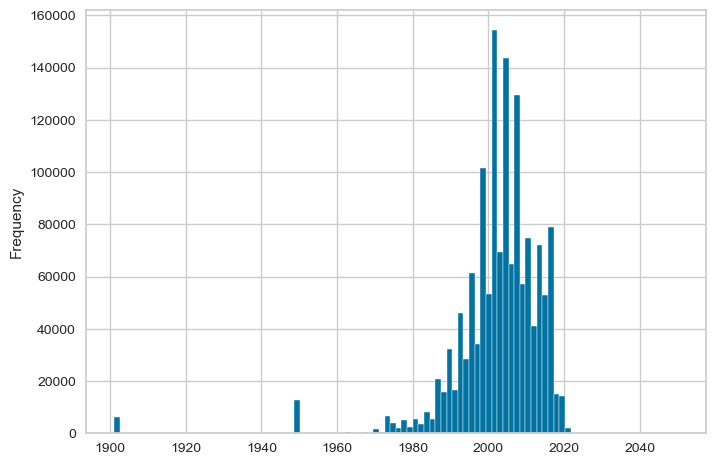

In [ ]:
#get a plot with the distribution of YearBuilt in df_network
df_network['YearBuilt'].plot(kind='hist', bins=100)

<AxesSubplot:ylabel='Frequency'>

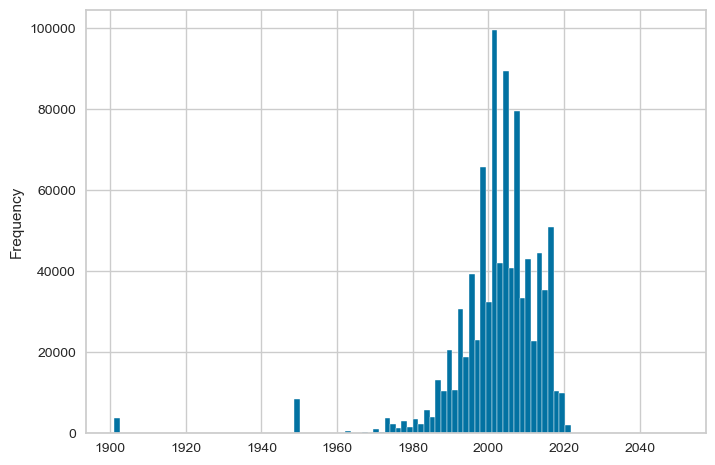

In [ ]:
sub_pipeline['YearBuilt'].plot(kind='hist', bins=100)

In [ ]:
sub_pipeline[sub_pipeline['NumConnectionsUnder'] >4].shape[0]

0

In [ ]:
df_train

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Incidence,Province,Town,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,No_Inspections,No_Previous_Incidences,average_severity_pipe,relative_risk,preventive_maintenance_rate,Probability_rate,Average_MonthsLastRev,pipe_inspected_frequently,Age_pipe_at_inspection,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection,incidence_area,connection_bool,Severity_high,Severity_medium,Severity_low,No_Previous_Severity_Low,No_Previous_Severity_Medium,No_Previous_Severity_High,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average yearly temperature (°C),Min. Temperature (°C),Max. Temperature (°C),Yearly Rainfall (mm),Average year Humidity (%),Rainy days per year (days),Yearly Sun Hours (hours)
0,489616,ZRV-00003385,2013,2013-05-08,16,0,ciudad real,Torralba de Calatrava,2012,0.06,7.79,0.40,0,0,0,1,0.00,4.00,0.00,0.00,0.00,21.40,1,1,49.47,0.16,1.54,0,0.00,0.00,0,0,0,0,0,0,0,1,0,0,0,1,0,0.00,60.72,0.16,15.44,1.50,33.70,438.00,0.55,52.00,107.50
1,489616,ZRV-00003385,2015,2015-03-04,22,0,ciudad real,Torralba de Calatrava,2012,0.06,7.79,0.40,0,0,0,2,0.00,4.00,0.00,0.00,0.00,21.40,1,3,49.47,0.16,1.54,0,0.00,0.00,0,0,0,0,0,0,0,1,0,0,0,1,0,0.00,60.72,0.16,15.44,1.50,33.70,438.00,0.55,52.00,107.50
2,489616,ZRV-00003385,2016,2017-01-12,22,0,ciudad real,Torralba de Calatrava,2012,0.06,7.79,0.40,0,0,0,3,0.00,4.00,0.00,0.00,0.00,21.40,1,4,49.47,0.16,1.54,0,0.00,0.00,0,0,0,0,0,0,0,1,0,0,0,1,0,0.00,60.72,0.16,15.44,1.50,33.70,438.00,0.55,52.00,107.50
3,489616,ZRV-00003385,2018,2018-12-19,23,0,ciudad real,Torralba de Calatrava,2012,0.06,7.79,0.40,0,0,0,4,0.00,4.00,0.00,0.00,0.00,21.40,1,6,49.47,0.16,1.54,0,0.00,0.00,0,0,0,0,0,0,0,1,0,0,0,1,0,0.00,60.72,0.16,15.44,1.50,33.70,438.00,0.55,52.00,107.50
4,489616,ZRV-00003385,2020,2020-12-05,24,0,ciudad real,Torralba de Calatrava,2012,0.06,7.79,0.40,0,0,0,5,0.00,4.00,0.00,0.00,0.00,21.40,1,8,49.47,0.16,1.54,0,0.00,0.00,0,0,0,0,0,0,0,1,0,0,0,1,0,0.00,60.72,0.16,15.44,1.50,33.70,438.00,0.55,52.00,107.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6336215,416536087,ZRV-00004347,2013,2013-06-25,0,0,la rioja,Baños de Rio Tobia,2011,0.05,0.45,45.00,0,0,0,1,0.00,4.00,0.00,0.00,0.00,0.00,1,2,408.60,0.00,0.07,0,0.00,0.00,0,0,0,0,0,0,0,1,1,0,0,0,0,0.00,0.21,2025.00,12.38,1.70,26.90,633.00,0.72,87.00,85.20
6336216,416536416,ZRV-00004347,2013,2013-06-25,0,0,la rioja,Baños de Rio Tobia,2011,0.10,0.48,45.00,0,0,0,1,0.00,4.00,0.00,0.00,0.00,0.00,1,2,212.97,0.00,0.15,0,0.00,0.00,0,0,0,0,0,0,0,1,1,0,0,0,0,0.01,0.23,2025.00,12.38,1.70,26.90,633.00,0.72,87.00,85.20
6336217,416536438,ZRV-00004347,2013,2013-06-25,0,0,la rioja,Baños de Rio Tobia,2011,0.10,0.48,45.00,0,0,0,1,0.00,4.00,0.00,0.00,0.00,0.00,1,2,216.09,0.00,0.15,0,0.00,0.00,0,0,0,0,0,0,0,1,1,0,0,0,0,0.01,0.24,2025.00,12.38,1.70,26.90,633.00,0.72,87.00,85.20
6336218,416536460,ZRV-00004347,2013,2013-06-25,0,0,la rioja,Baños de Rio Tobia,2011,0.05,0.21,45.00,0,0,0,1,0.00,4.00,0.00,0.00,0.00,0.00,1,2,189.00,0.00,0.03,0,0.00,0.00,0,0,0,0,0,0,0,1,1,0,0,0,0,0.00,0.04,2025.00,12.38,1.70,26.90,633.00,0.72,87.00,85.20


In [ ]:
#I want to create a column called previous incidences which is the sum of all the incidences in the previous inspections based on InspectionYear and PipeId and that is different for each year

